## Diamonds Data Analysis

Diamonds are the crown jewel of the jewelry industry. As a luxury item, there is a broad range of quality-related characteristics and prices, designed to accommodate many customer segments. The dataset contains sample data on 6,000 diamonds. Each row contains a summary of characteristics for each diamond, including the 4 C's (carat weight, color, clarity, cut), polish, symmetry, certifying agency (report), and price. 

In [1]:
%pylab inline
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
diamonds = pd.read_csv('diamonds.csv')
diamonds.head()

,ID,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,2,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,3,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,4,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,5,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [3]:
sum(diamonds.isna())

ID              0
Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64

In [4]:
table = diamonds.pivot_table(index = 'Cut' , columns = 'Color', values = 'Price', aggfunc = 'mean', fill_value = 0)
new_index = ['Fair','Good','Very Good', 'Ideal', 'Signature-Ideal']
table = table.reindex(index = new_index)

In [5]:
table

Color,D,E,F,G,H,I
Cut,,,,,,
Fair,6058.250000,5370.625000,6063.625000,7345.523810,5908.500000,4573.187500
Good,10058.716216,8969.545455,9274.007519,9988.614865,9535.132812,8174.113043
Very Good,13218.826415,12101.910217,12413.905495,12354.013841,10056.106132,8930.031332
Ideal,18461.953571,12647.107914,14729.426997,13570.310145,11527.700873,9459.588378
Signature-Ideal,19823.100000,11261.914286,13247.947368,10248.296875,9112.688889,8823.463415


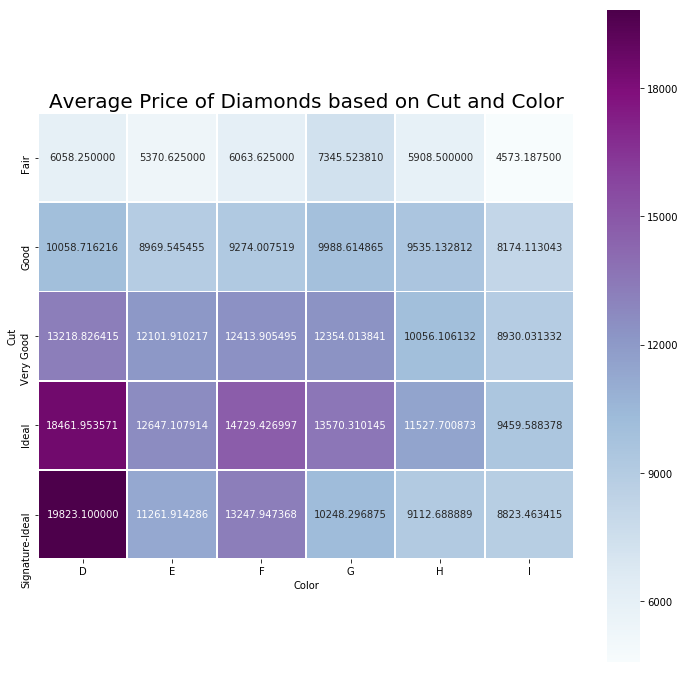

In [6]:
plt.figure(figsize = (12,12))
sns.heatmap(table, cmap='BuPu', annot=True, fmt='f', square=True, linewidths=1);
plt.title('Average Price of Diamonds based on Cut and Color',{'fontsize': 20,
 'fontweight' : 10});

## Insight from this heatmap

This heatmap indicates that both cut and color are positive related with price. For example, the signature-ideal cut diamond with a color leve of D has the highest average price. 

we can evaluate the value of the diamond based on its cut and color. Since the cut is the primary focus during the search, and color is visible to the eye, in a given level of cut and color, we could provide a estimate/ average price of the diamond based on this heatmap.

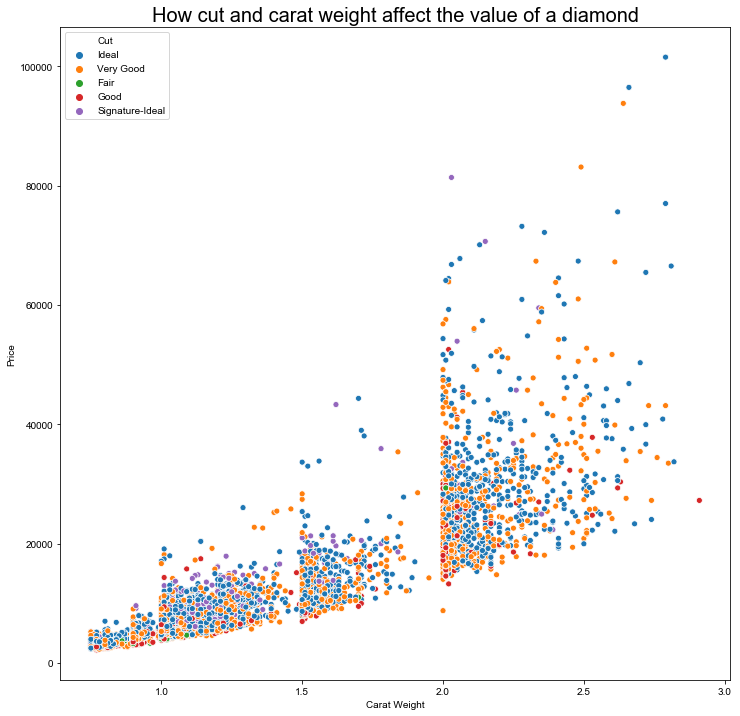

In [7]:
plt.figure(figsize=(12,12))
sns.scatterplot(x = diamonds['Carat Weight'],y = diamonds['Price'], hue = diamonds['Cut'])
plt.title('How cut and carat weight affect the value of a diamond',{'fontsize': 20,
 'fontweight' : 10})
sns.set_style('white')

## Insight from the scatter plot

It's obvious that for a diamond, the more the carat weight, the higher the price will be. But when we introduce one of the 4Cs of diamond - the cut, we can observe something interesting. 

Taking the red dots at the right hand side of the plot, red means good cut, not cut very well, so even it has almost 3 carat, the price is relatively low compare with other diamonds. 

Blue dots represent Ideal cutted diamond, while orange dots represent "very good" cutted diamonds which is not as well as blue dots in terms of cut. We could observe that under the same carat weight, blue dots have higher price than orange dots.

This shows the interaction effect of cut and caratweight on diamonds overall quality or its value.